# Universidade Federal do Rio Grande do Norte

##  Processamento Digital de Sinais 

### Simulação Computacional - Amostragem periódica - Matlab

**Aluno:**  Lucas Bezerra Dantas Saraiva

**Professor:**  Luiz Felipe de Queiroz Silveira

**Data de entrega :**  20/10/2017


--------
### Amostragem

A amostragem é um processo completamente reversível, que pode ser desfeito sem perdas. Isso significa que o conjunto de amostras pode ser usado para reconstruir completamente o sinal contínuo. Para que isso ocorra, o processo de amostragem deve obedecer algumas regras. 

> Dado um sinal contínuo $m(t)$ com largura de banda $B$, desde que a frequência de amostragem seja maior que dobro da largura de banda ($f_{s}$ > 2B) é possível recuperar o sinal contínuo perfeitamente a partir do sinal amostrado (Teorema de Nyquist). 

> O sinal amostrado deve ser limitado em banda. Essa segunda regra pode ser garantida com um filtro passa-baixa aplicado ao sinal contínuo antes da amostragem.

Essas regras devem ser obedecidas para evitar o _aliasing_ (mascaramento), que nada mais é que a sobreposição das cópias espectrais resultantes do processo de amostragem. Nesta prática, veremos esse efeito em um sinal exponencial.

O código a seguir mostra a maneira genérica de gerar um sinal senoidal no Matlab. Dessa maneira, dependedo do referencial temporal, podemos modelar um sinal contínuo no tempo (taxa amostragem alta). Contudo, isso é somente um modelo, pois, na realidade, todos os sinais em um computador são discretos.


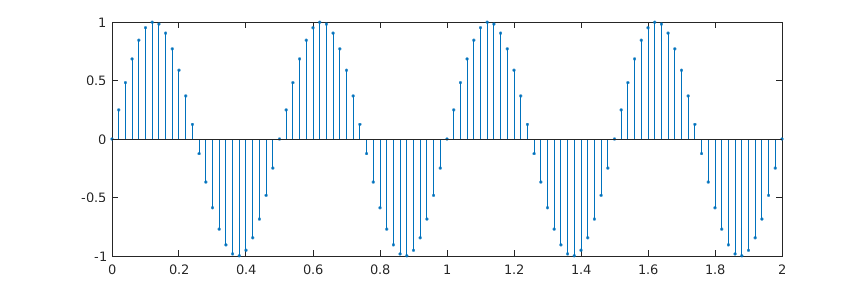

In [2]:
Ts = 0.02;                                          % Período de amostragem
t = 0:Ts:2;                                         % Eixo do tempo
m = sin(2*pi*2*t);                                  % Sinal m(t)
fig = figure;
stem(t,m,'.');
fig.PaperUnits = 'inches';
fig.PaperPosition = [0 0 9 3];

O sinal $m(t)$ construído acima não é contínuo no tempo, mas discreto. Contudo, depedendo da maneira que o sinal é mostrado (função stem ou função plot), sua visualização no domínio do tempo é diferente.  Isso ocorre porque a função $plot$ liga os pontos do vetor por meio de retas, dando a visualização de um sinal contínuo. Contudo, a amostra em $t = 0.01$, simplesmente, não existe, pois o eixo temporal foi construído em passos de $0.02$. 


## Subamostragem e Sobreamostragem

A importância da sobreamostragem e subamostragem está na adequação do rítmo das amostras numa cadeia de processamento digital de sinais envolvendo hardwares diferentes. Podemos ter situações que hardwares com diferentes capacidades de processamento tenham que, ao trabalharem em conjunto no mesmo sinal, realizar mudanças de taxa de amostragem para adequar o envio/recebimento de amostras no ritmo que eles consigam trabalhar. Como por exemplo a placa de som de um computador. Trabalhando numa frequência de $f=44.1 kHz$ precisam que os softwares que a usam mandem amostras nesse ritmo para que não distorça o sinal de áudio.

O processo de amostragem será baseado na amostragem ensinada no [Lathi](https://www.amazon.com/Digital-Communication-Electrical-Computer-Engineering/dp/0195331451). Será feito uso de duas funções do Matlab: ** Downsample** e **Upsample**.

A função **downsample** do Matlab coleta amostras em um intervalo de $N$ elementos, especificado como parâmetro

In [1]:
N = 10;                                             % Número de amostras puladas
x=0:1:100;                                          % Vetor com número inteiros de 0 à 100, de 1 em 1
y= downsample(x,N);                                 % Coleta 1 elemento a cada 10 elementos do vetor
disp(y);


     0    10    20    30    40    50    60    70    80    90   100



Similarmente, a função **upsample** do Matlab aumenta o vetor preenchendo com zeros $(N - 1)$ elementos entre as amostras do vetor de entrada.

In [2]:
x=1:1:10;                                            % Vetor com inteiros de 1 a 10
N = 3;                                               % Número de sobreamostragem
y = upsample(x,N);                                   % Coloca 1 amostra a cada (N-1) elementos
disp(y);

  Columns 1 through 13

     1     0     0     2     0     0     3     0     0     4     0     0     5

  Columns 14 through 26

     0     0     6     0     0     7     0     0     8     0     0     9     0

  Columns 27 through 30

     0    10     0     0



O uso em conjunto dessas duas funções permite simular a amostragem ideal (retornando imediatamente para zero).


# Experimento:


Queremos fazer a amostragem do sinal $x(t)=e^{-1000\left | t \right |}$. Primeiramente queremos saber qual a banda mínima do sinal para que não sofra sobreposição espectral calculando pela definição da DTFT. Temos que 

$$ X(\Omega)=\int_{-\infty}^{\infty}x(t)\cdot e^{-j \Omega t} dt$$

Aplicando  a $x(t)$

$$ X(\Omega)=\int_{-\infty}^{\infty} e^{-1000\left | t \right |} \cdot e^{-j \Omega t} dt$$

Podemos representar $\left |t \right |=\left\{\begin{matrix}t , &t \geq 0 \\ -t , &t \leq 0 \end{matrix}\right.$. Então representaremos $x(t)$ como:

$$x(t) = e^{-1000|t| } =\left\{\begin{matrix}e^{-1000t }, &t\geq 0 \\ e^{1000t }, &t\leq 0\end{matrix}\right.$$

Aplicando a propriedade da transformada da soma igual a soma das transformadas

$$ X(\Omega)=\int_{0}^{\infty}e^{-1000 t }  \cdot e^{-j \Omega t} dt + \int_{-\infty}^{0}e^{1000 t}  \cdot e^{-j \Omega t} dt $$


Obtem-se no domínio $\Omega$
$$X(\Omega)=\frac{e^{-t(1000+j\Omega)}}{-1000-j\Omega}\left.\begin{matrix}\\\\\end{matrix}\right|_{0}^{\infty} + \frac{e^{t(1000-j\Omega)}}{1000-j\Omega}\left.\begin{matrix}\\\\\end{matrix}\right|_{-\infty}^{0}$$


$$ = \frac{e^{-\infty}-e^{0}}{-(1000+j\Omega)} +\frac{e^{0}-e^{-\infty}}{(1000-j\Omega)} $$

$$= \frac{1}{(1000+j\Omega)} +\frac{1}{(1000-j\Omega)}$$

Finalmente

$$X(\Omega)= \frac{2000}{(10^{6}+\Omega^{2})}$$
Podemos simular o sinal em frequência $X(\Omega)$ e ver até onde é conveniente levar em consideração a amplitude. O critério será usado como $X(\Omega_{e})= 1\% \left|X(\Omega) \right |$.


ans =

       -9950



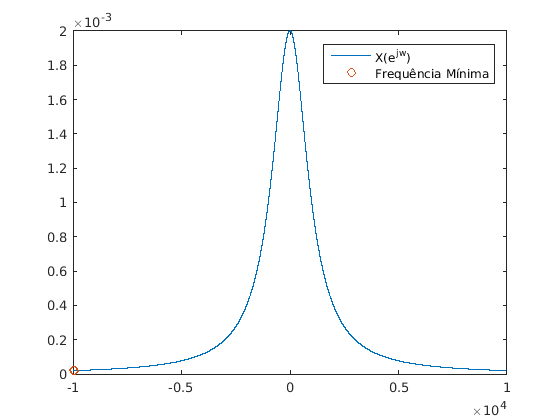

In [4]:
clc;clear all;close all;
%% Parâmetros
Omega=-10000:1:10000;                                               % Montagem do eixo ômega
X_Omega=2000./(1e6+Omega.^(2));                                     % Espectro de x(t)
indice=find(X_Omega(1,1:length(X_Omega)/2) <= 0.01*max(X_Omega));   % Encontra indice onde X(Omega)<0.01*X(Omega)
plot(Omega,X_Omega,Omega(indice),X_Omega(indice),'o')               % Mostra gráfico e pontos
Omega(max(indice))                                                  % Display valor de frequência
legend('X(e^{jw})','Frequência Mínima')

O erro máximo é de $ E$ ≅  $2\%$ ocorrendo pelo baixo aliasing, já que nosso critério foi encontrar a frequência cuja 